In [407]:
import pandas as pd
import seaborn as sns
%matplotlib inline

In [408]:
mydata = pd.read_csv("../data/tidy_intro_1.txt", delimiter=",")

In [409]:
mydata

,WWTP,Treatment,pH
0,Destelbergen,A,8.0
1,Landegem,A,7.5
2,Dendermonde,A,8.3
3,Eeklo,A,6.5
4,Destelbergen,B,6.3
5,Landegem,B,5.2
6,Dendermonde,B,6.2
7,Eeklo,B,7.2


# I need the short-format...

For visualisations and to get a quick comparison, the short form can be required:

| WWTP | Treatment A | Treatment B |
|:------|-------------|-------------|
| Dendermonde | 8.3  | 6.2 |
| Destelbergen | 8.  | 6.3 |
| Eeklo | 6.5  | 7.2 |
| Landegem | 7.5  | 5.2 |

The `pivot` and `pivot_table` commands will provide you a convenient way to get there, starting from the tidy version:

In [410]:
short_form = mydata.pivot(index="WWTP", columns="Treatment", values="pH")
short_form

Treatment,A,B
WWTP,,
Dendermonde,8.3,6.2
Destelbergen,8.0,6.3
Eeklo,6.5,7.2
Landegem,7.5,5.2


And, for example, create a `heatmap` of the data

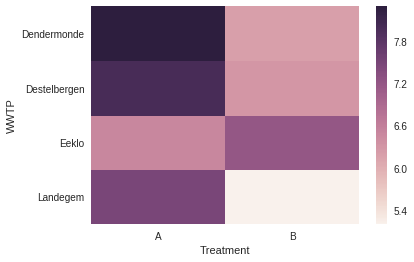

In [411]:
sns.heatmap(short_form)

(for `R`-users, the commands are `gather`/`spread`)

<div class="alert alert-success">
    The switch from a tidy format to a short format is just a `pivot` command away
</div>

# Summary statistics

What we sometimes do with the short-form, is providing summary statistics:

In [412]:
short_form

Treatment,A,B
WWTP,,
Dendermonde,8.3,6.2
Destelbergen,8.0,6.3
Eeklo,6.5,7.2
Landegem,7.5,5.2


In [413]:
short_form.mean()

Treatment
A    7.575
B    6.225
dtype: float64

In [414]:
mydata

,WWTP,Treatment,pH
0,Destelbergen,A,8.0
1,Landegem,A,7.5
2,Dendermonde,A,8.3
3,Eeklo,A,6.5
4,Destelbergen,B,6.3
5,Landegem,B,5.2
6,Dendermonde,B,6.2
7,Eeklo,B,7.2


Starting from a tidy format, you will use a `groupby`, which provides all summary statistics based on groups:

In [415]:
mydata.mean()

pH    6.9
dtype: float64

In [416]:
mydata.groupby('Treatment').mean() # WWTP

,pH
Treatment,
A,7.575
B,6.225


In [387]:
mydata.groupby('Treatment').describe() # single readable command from the tidy dataset

pH                                              
          count   mean       std  min   25%   50%    75%  max
Treatment                                                    
A           4.0  7.575  0.788987  6.5  7.25  7.75  8.075  8.3
B           4.0  6.225  0.818026  5.2  5.95  6.25  6.525  7.2

For `R`-users, the `groupby` function is available as well, using the `dplyr` package.

<div class="alert alert-success">
    `groupby` is doing the usual summary statistics, but for any kind of factorial column variable in the dataset
</div>

# Plots

Many plotting environments in both R and Python (as well as more and more commercial environments such as Tableau,...) provide direct interaction with `tidy` data sets. 

## Altair

In [388]:
from altair import Chart, Column, Color, Axis, Scale, X, Y, Bin

[Altair](https://altair-viz.github.io/) is such an example from the Python-package ecosystem...

We define what we want to see in the graph:

For the different `WWTP` as individual columns, provide the `pH` as function of the `Treatment`...

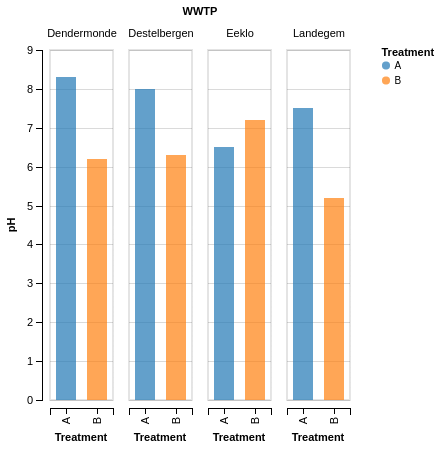

In [390]:
Chart(mydata).mark_bar().encode(
    column='WWTP',
    x='Treatment',
    y='pH',
    color='Treatment')

But,...  *Never trust the default* ;-)

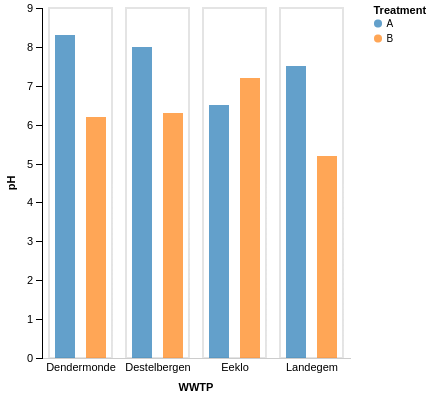

In [391]:
Chart(mydata).mark_bar().encode(
    column=Column('WWTP', 
                  axis=Axis(axisWidth=0.2, offset=-8.0, orient='bottom'), 
                  scale=Scale(padding=14.0)),    
    x= X('Treatment', axis=False),
    y= Y('pH', axis=Axis(grid=False)),
    color=Color('Treatment'))

## ggplot (Grammar of graphics)

The [`plotnine` package](https://plotnine.readthedocs.io/en/latest/) in Python provides a `ggplot`interface for Python:

In [392]:
from plotnine import (ggplot, aes, geom_bar, stat_smooth, 
                      stat_boxplot, geom_point, facet_wrap)

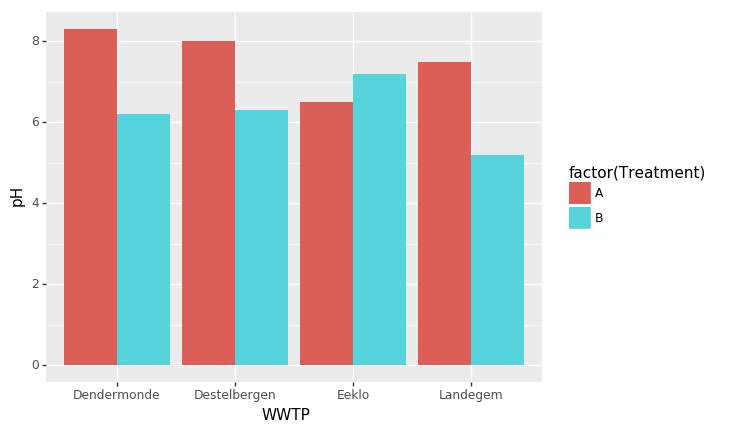

<ggplot: (-9223363307789515474)>

In [393]:
ggplot(mydata, aes(x='WWTP', y='pH', fill='factor(Treatment)')) \
    + geom_bar(stat='identity', position='dodge')

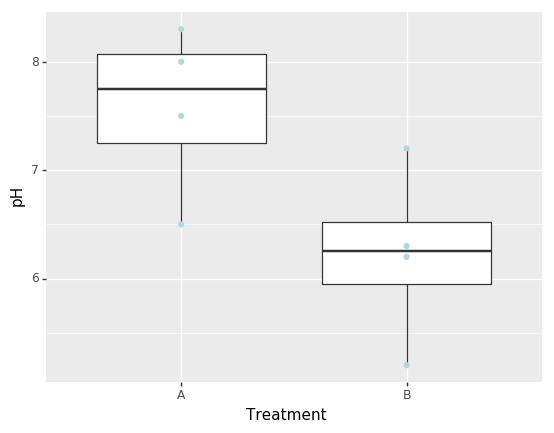

<ggplot: (8729065242088)>

In [394]:
ggplot(mydata, aes('Treatment', 'pH')) \
    + stat_boxplot() + geom_point(colour='lightblue')

(*I'm fully aware of the limited size of my data set... This is just an example!*)

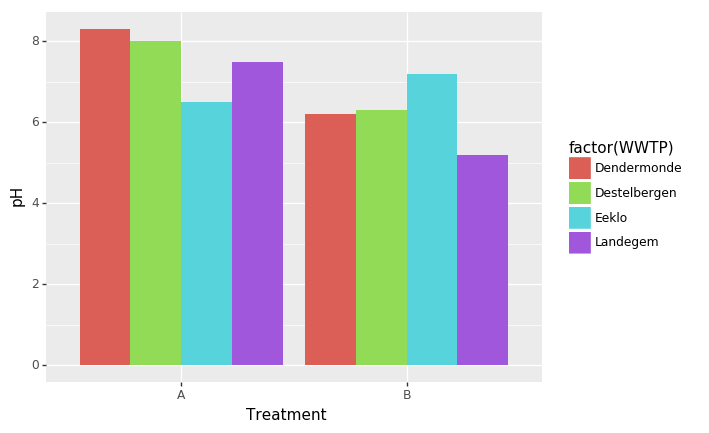

<ggplot: (8729065189517)>

In [395]:
ggplot(mydata, aes('Treatment', 'pH', fill='factor(WWTP)')) \
    + geom_bar(stat='identity', position='dodge')

An example with an alternative data set, providing an experiment with the effect for different `input` Concentration:

In [396]:
# %load ../data/tidy_intro_2.txt

In [397]:
conc_experiment = pd.read_csv("../data/tidy_intro_2.txt", delimiter=",")
conc_experiment

,input,Treatment,pH
0,2.0,A,8.0
1,3.0,A,7.5
2,4.0,A,7.8
3,5.0,A,6.5
4,2.0,B,5.8
5,3.0,B,5.2
6,4.0,B,6.2
7,5.0,B,7.2


A linear regression applied on the tidy data set is a single function:

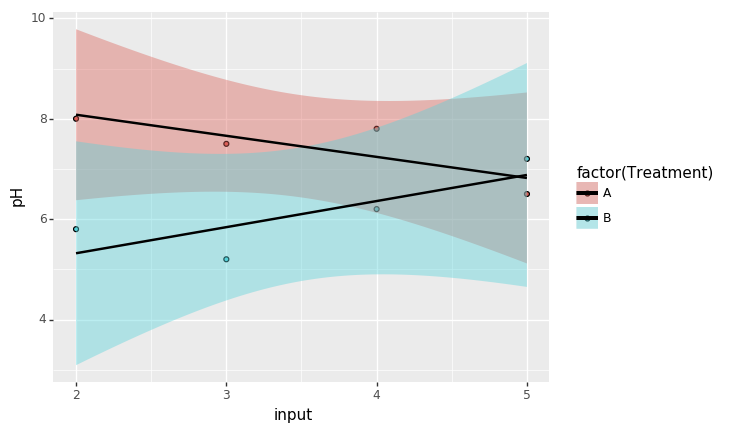

<ggplot: (8729065629637)>

In [399]:
ggplot(conc_experiment, aes(x='input', y='pH', fill='factor(Treatment)')) \
    + geom_point() + stat_smooth(method='lm') + facet_wrap('~Treatment')

## Bokeh plot library

One of the nice items about Bokeh, is the creation of interactive plots...

In [315]:
from bokeh.charts import Bar, show, BoxPlot
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

In [316]:
p = Bar(mydata, label='WWTP', values='pH', 
        group='Treatment', legend='top_right')
show(p)

In [317]:
p = BoxPlot(mydata, values='pH', 
            label='Treatment', legend='bottom_right')
show(p)

<div class="alert alert-success">
    Plotting libraries (`seaborn`, `altair`, `ggplot`, `bokeh`...) are ready to digest your `tidy` data!
</div>